In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the data and preprocessing it

Load and visualize the data

In [18]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
# Identifying columns with all zero values
zero_columns = df.columns[(df == 0).all()]
print("Columns with all zero values:", zero_columns)


Columns with all zero values: Index([], dtype='object')


In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

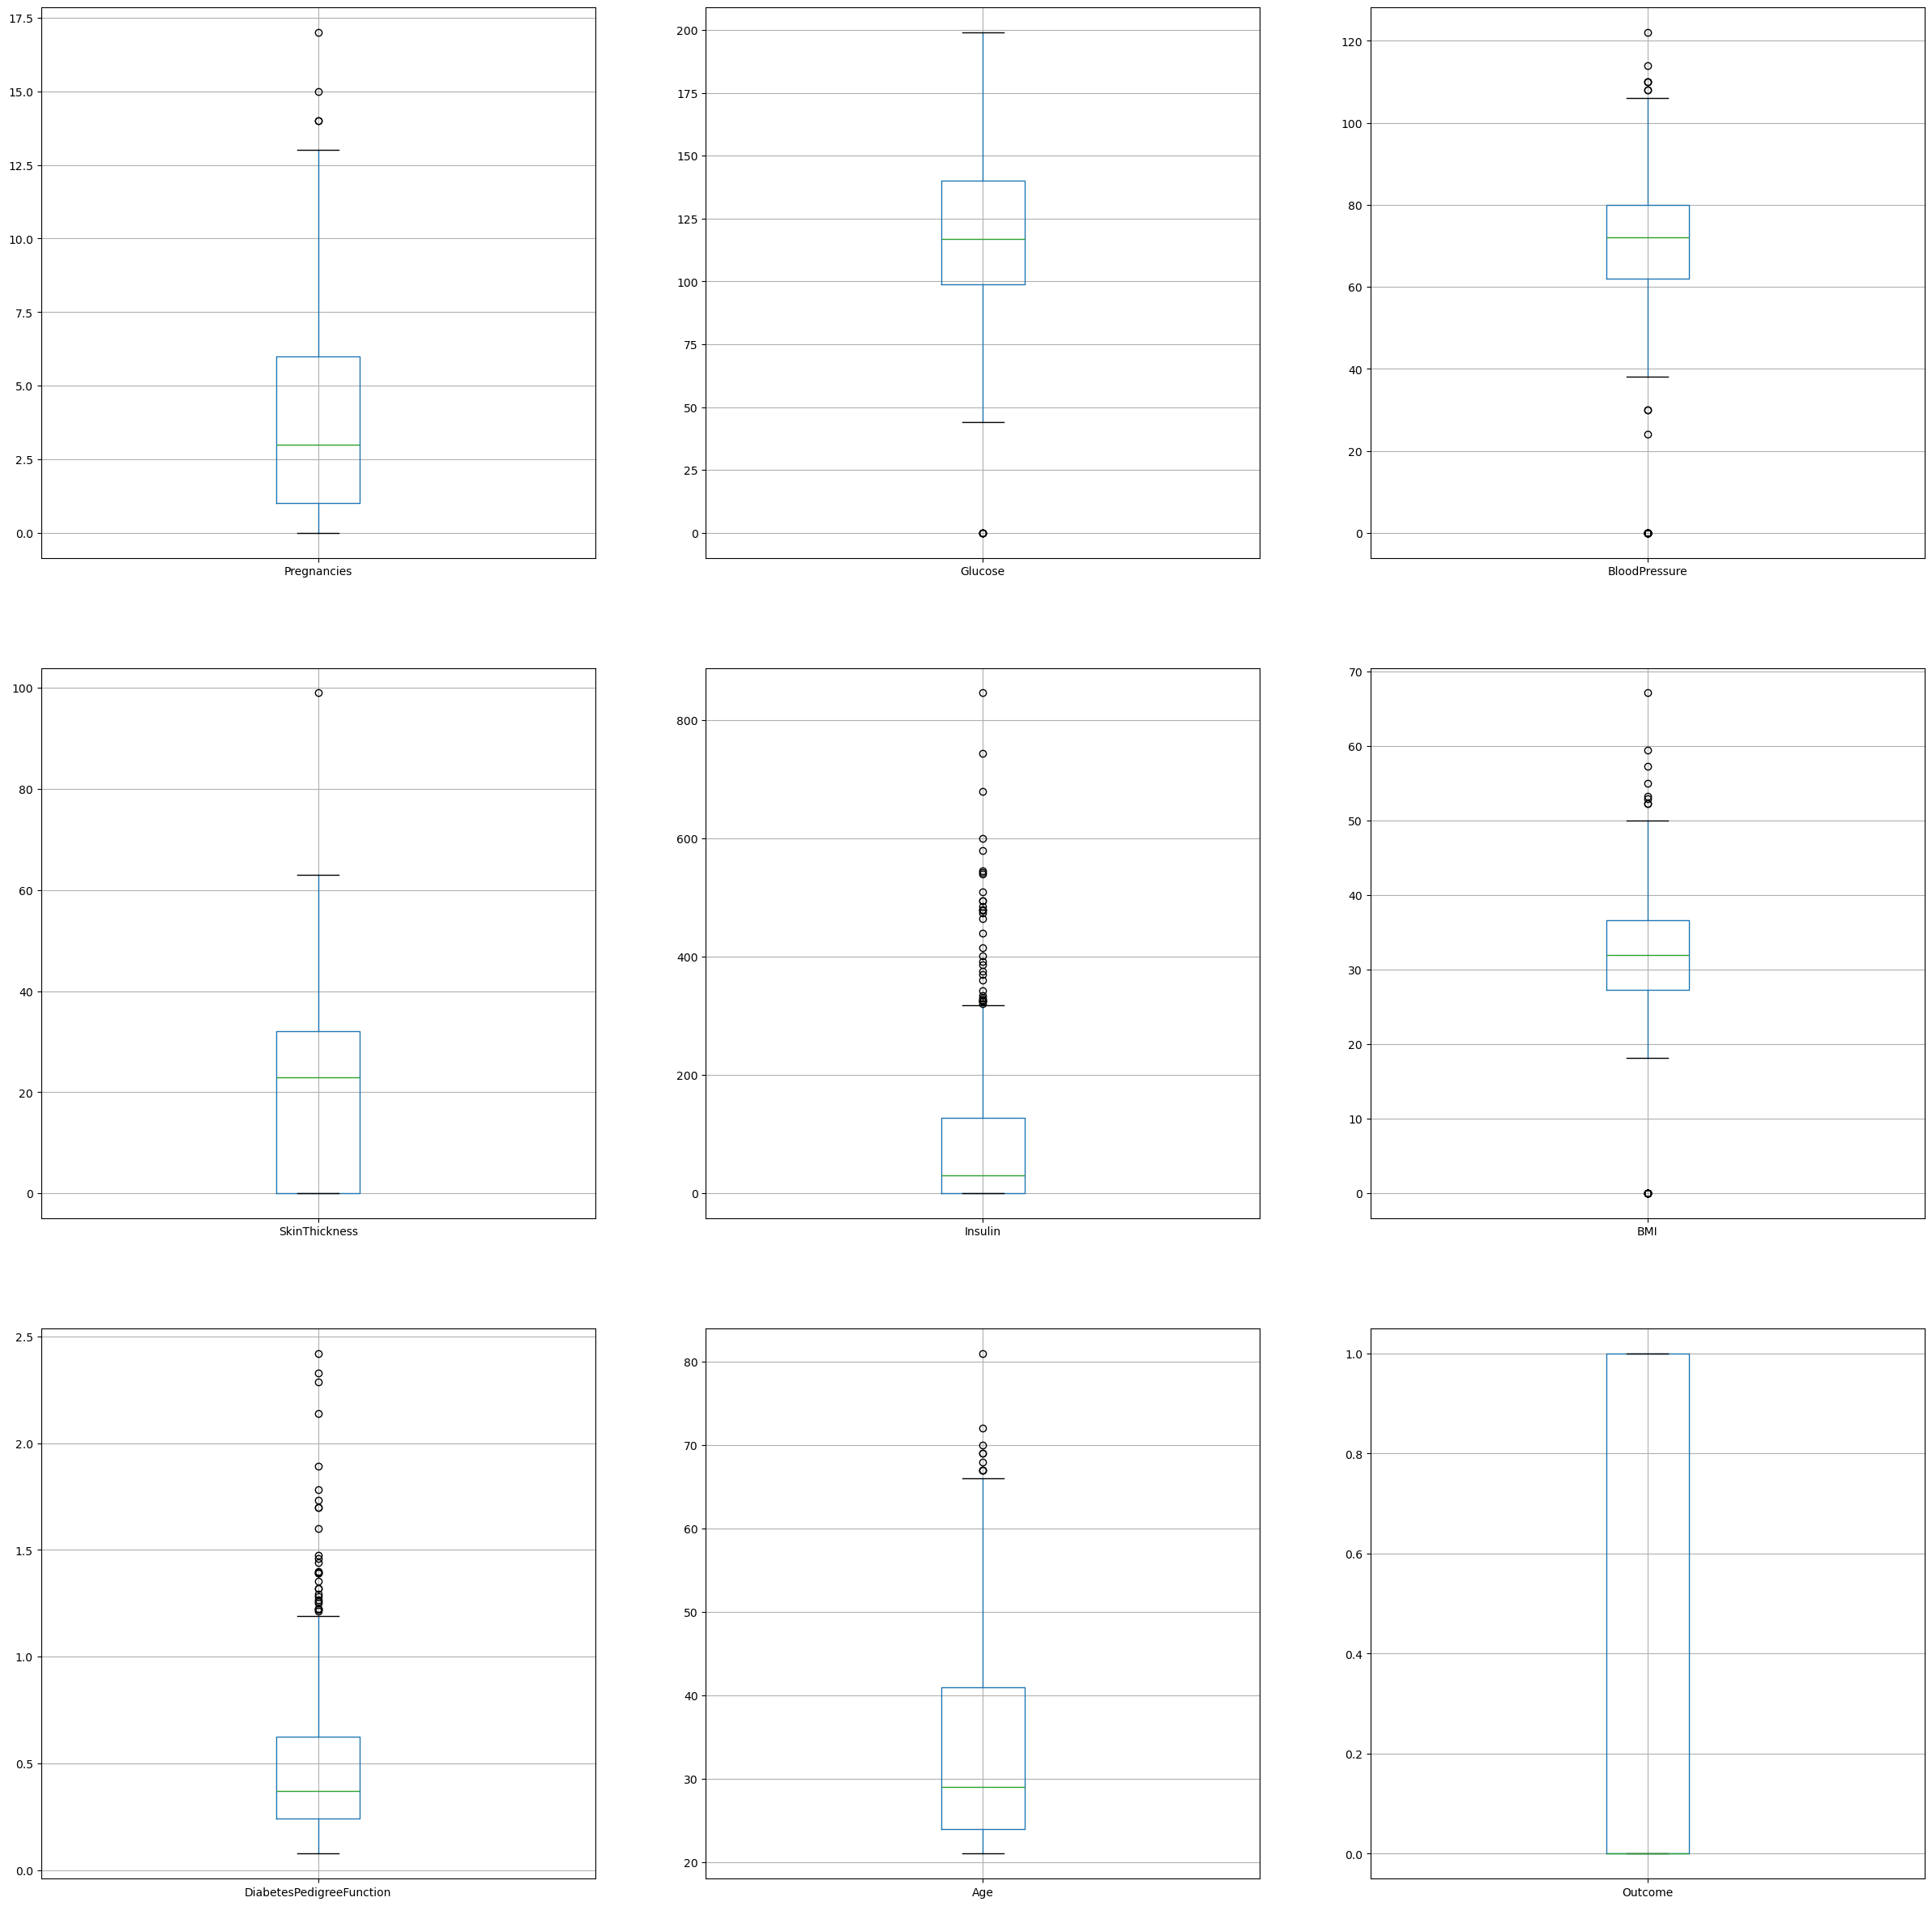

In [22]:
plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
df.boxplot(column='Pregnancies')

plt.subplot(3,3,2)
df.boxplot(column='Glucose')

plt.subplot(3,3,3)
df.boxplot(column='BloodPressure')

plt.subplot(3,3,4)
df.boxplot(column='SkinThickness')

plt.subplot(3,3,5)
df.boxplot(column='Insulin')

plt.subplot(3,3,6)
df.boxplot(column='BMI')

plt.subplot(3,3,7)
df.boxplot(column='DiabetesPedigreeFunction')

plt.subplot(3,3,8)
df.boxplot(column='Age')

plt.subplot(3,3,9)
df.boxplot(column='Outcome')

plt.show()

Remove Outliers

In [23]:
# Remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   639 non-null    int64  
 2   BloodPressure             639 non-null    int64  
 3   SkinThickness             639 non-null    int64  
 4   Insulin                   639 non-null    int64  
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    int64  
 8   Outcome                   639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


Shape of data after removing outliers: (639, 9)


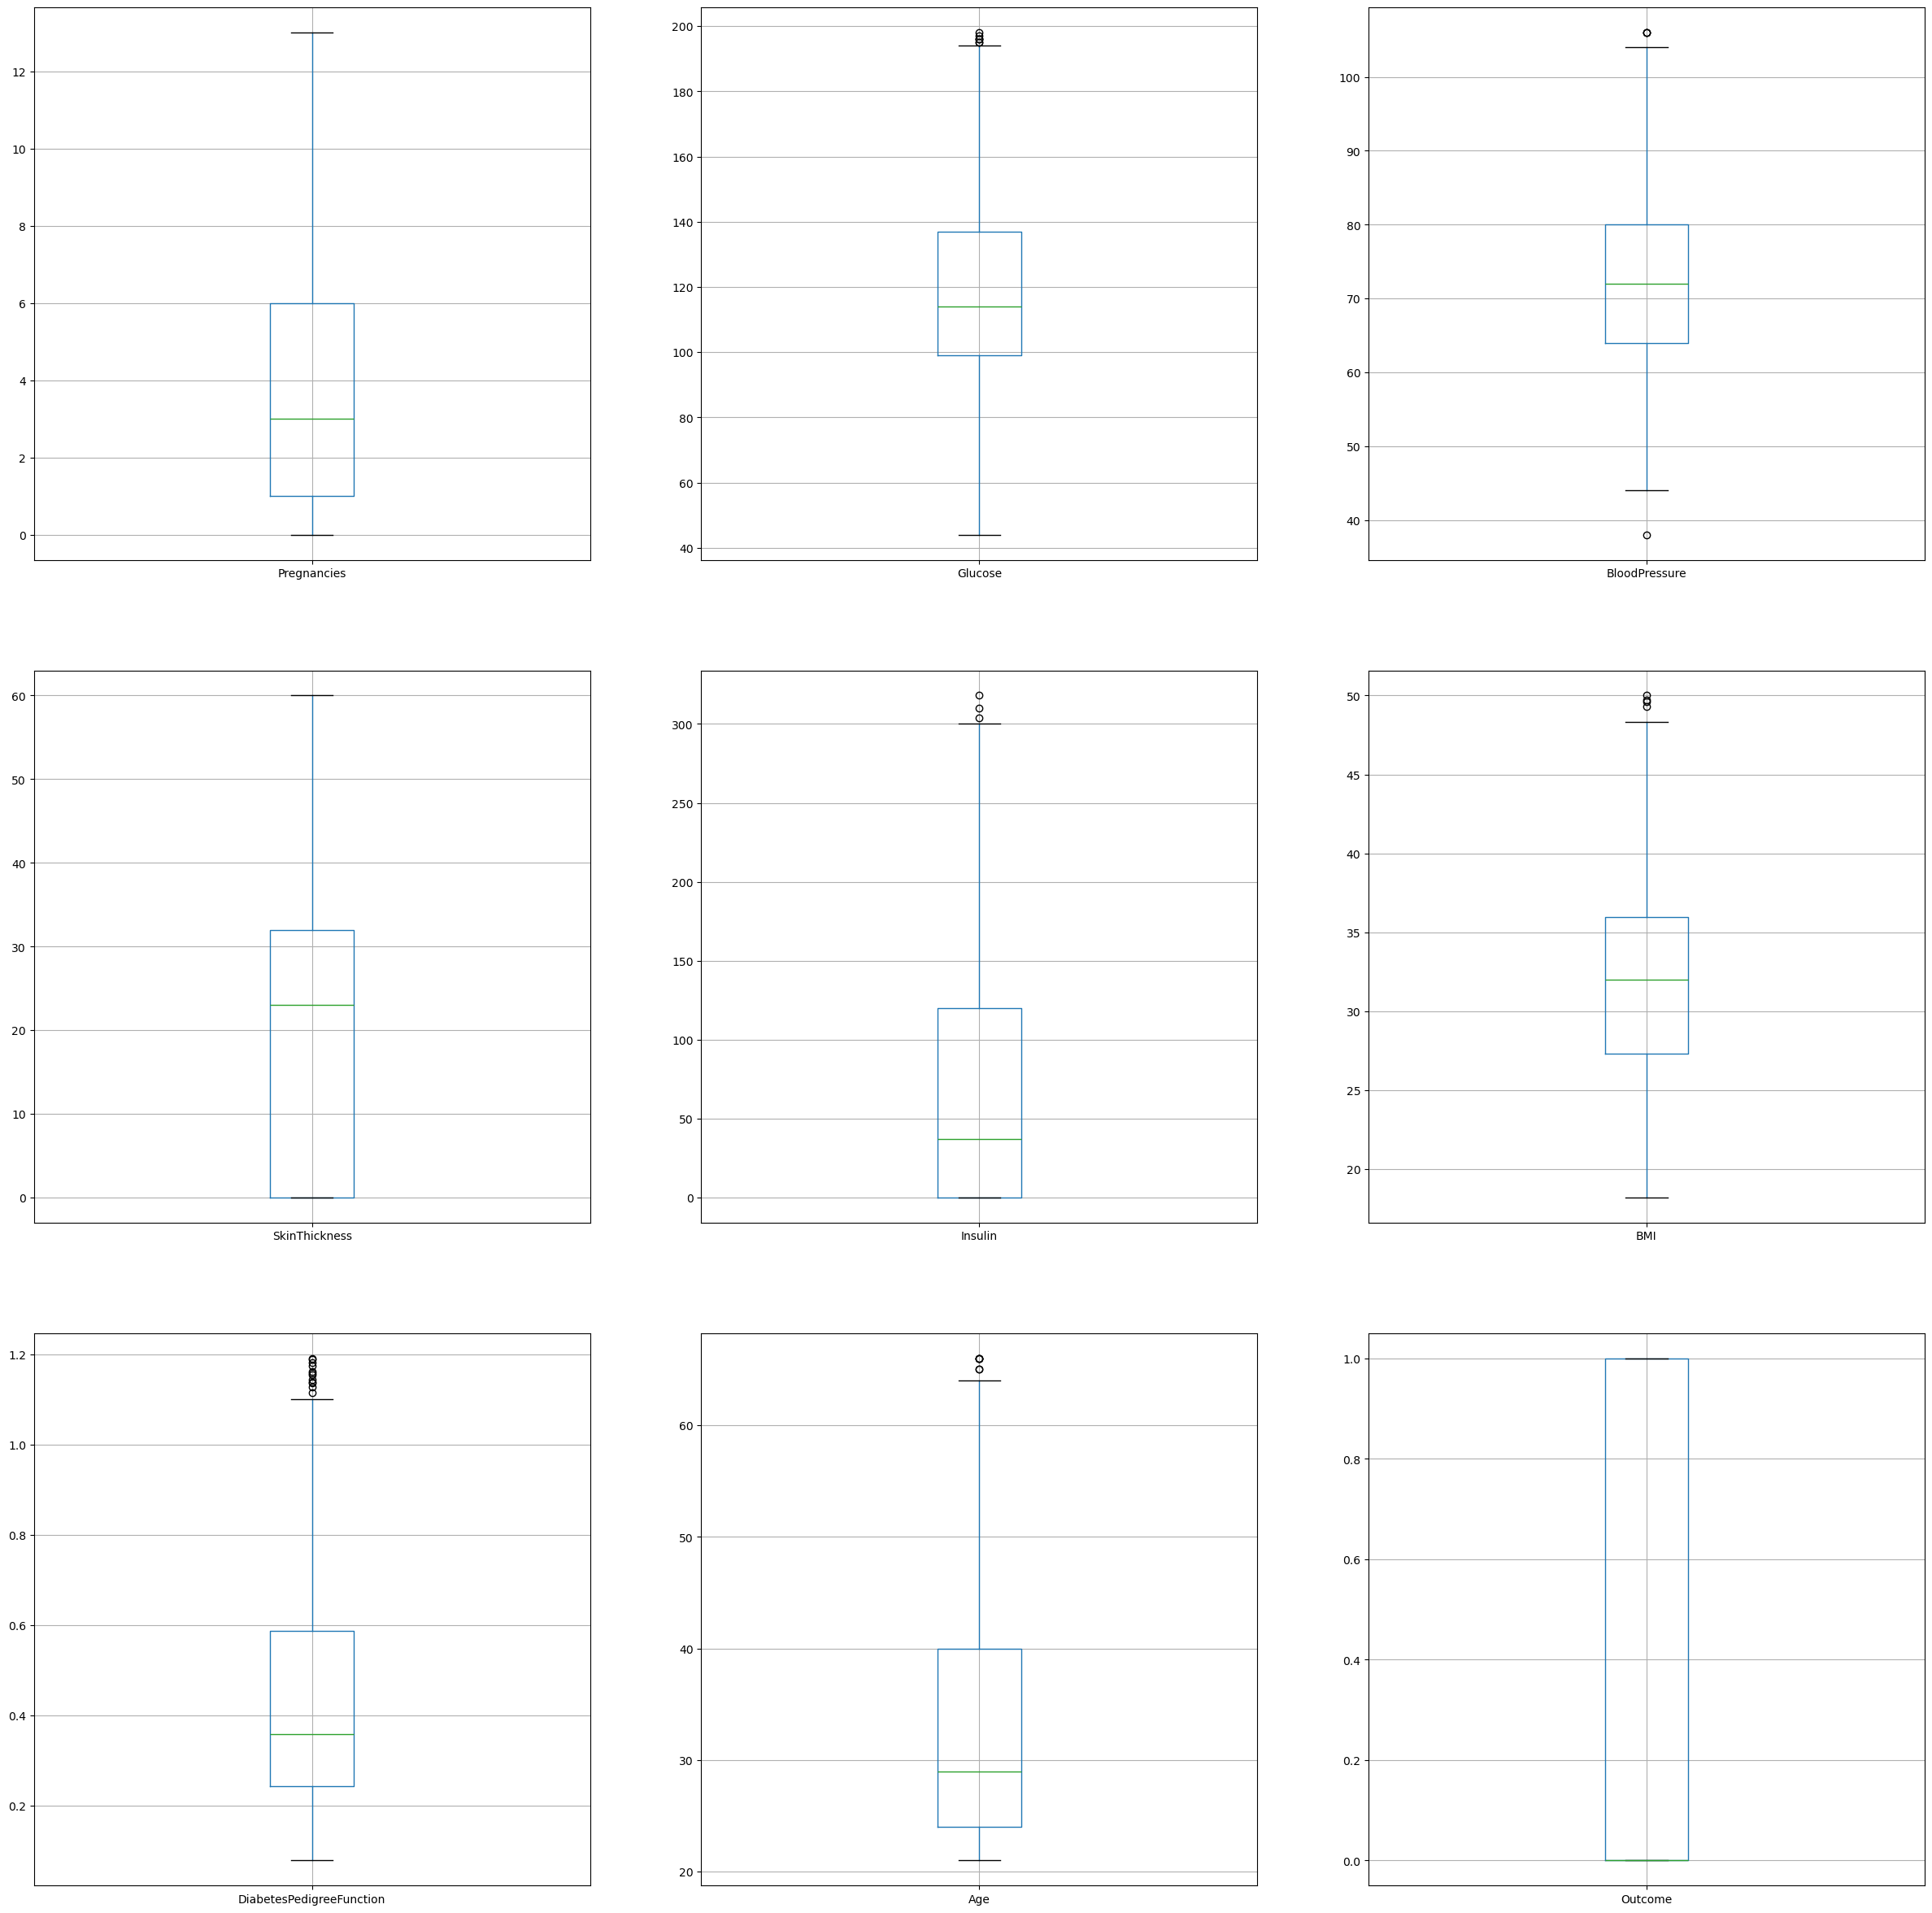

In [24]:
print("Shape of data after removing outliers:", df.shape)

plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
df.boxplot(column='Pregnancies')

plt.subplot(3,3,2)
df.boxplot(column='Glucose')

plt.subplot(3,3,3)
df.boxplot(column='BloodPressure')

plt.subplot(3,3,4)
df.boxplot(column='SkinThickness')

plt.subplot(3,3,5)
df.boxplot(column='Insulin')

plt.subplot(3,3,6)
df.boxplot(column='BMI')

plt.subplot(3,3,7)
df.boxplot(column='DiabetesPedigreeFunction')

plt.subplot(3,3,8)
df.boxplot(column='Age')

plt.subplot(3,3,9)
df.boxplot(column='Outcome')

plt.show()

Spliting the data into features and targets

In [25]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Verify the split
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
5                     0.201   30  

Target (y):
0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64


Scale the data

In [26]:

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the features and transform the features
X_scaled = scaler.fit_transform(X)

# Verify the scaling
print("Scaled Features (X_scaled):")
print(X_scaled[:5])



Scaled Features (X_scaled):
[[ 0.67382449  0.99135111 -0.01062636  0.94184729 -0.82924748  0.24797421
   0.7888924   1.56113222]
 [-0.86065109 -1.170674   -0.53973612  0.55040637 -0.82924748 -0.84085334
  -0.31175881 -0.15491181]
 [ 1.28761472  2.19247617 -0.71610604 -1.34155809 -0.82924748 -1.35415776
   0.96834641 -0.0645937 ]
 [-0.86065109 -1.03340257 -0.53973612  0.15896544  0.35303543 -0.60753315
  -1.04552629 -1.05809288]
 [ 0.36692937 -0.10682038  0.16574356 -1.34155809 -0.82924748 -0.99640013
  -0.90993883 -0.24522991]]


In [27]:
X_copy = X_scaled.copy()
y_copy = y.copy()

Spliting the data into training and testing sets

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print("Training Features (X_train):")
print(X_train[:5])
print("\nTraining Target (y_train):")
print(y_train[:5])
print("\nTesting Features (X_test):")
print(X_test[:5])
print("\nTesting Target (y_test):")
print(y_test[:5])

# ...existing code...

Training Features (X_train):
[[-0.55375598 -1.23930972 -0.53973612  0.15896544 -0.20037359  0.0302087
   0.27046973 -0.96777477]
 [ 1.28761472  0.03045106  1.22396308 -1.34155809 -0.82924748 -0.56086912
  -0.67864255 -0.96777477]
 [ 0.98071961 -0.1754561  -0.53973612 -1.34155809 -0.82924748  0.12353677
  -0.68263042  0.83858737]
 [-0.55375598  0.33931179  0.16574356  0.35468591  1.74913547  0.18575549
   0.6453292  -0.69682045]
 [ 1.90140496 -1.75407761  2.98766228  0.15896544 -0.21295107  0.54351311
  -0.57495802  1.2901779 ]]

Training Target (y_train):
441    0
731    1
64     1
685    0
672    0
Name: Outcome, dtype: int64

Testing Features (X_test):
[[-0.55375598 -0.65590612 -0.53973612 -0.03675502  0.30272552  0.13909145
   1.74598042 -0.42586613]
 [-0.55375598  0.37362965  2.10581268 -1.34155809 -0.82924748 -1.46304051
  -0.64275175 -1.05809288]
 [ 1.28761472 -1.170674   -1.50977067 -0.03675502 -0.82924748 -1.18305629
  -1.16915016  0.83858737]
 [-0.55375598 -1.03340257  1.57670

# Train the model

Hyperparameter Tuning / SVM

In [ ]:
# Randomized search 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of hyperparameters
Param_distribution = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf', 'poly'],
                'degree': [2, 3, 4]
                }

# create the svm model
model = svm.SVC()

# create a gridsearchCV of the model
RandomizedSearch = RandomizedSearchCV(model, Param_distribution, n_iter=10, refit = True, verbose = 2, cv=3, n_jobs=-1)


# fit the model
model = RandomizedSearch.fit(X_train, y_train)

# use the best model for predictions
best_model = RandomizedSearch.best_estimator_
y_pred = best_model.predict(X_test)

print("Best model", best_model)


# Evaluate the model
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy score of the best data", accuracy)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best model SVC(C=1, degree=2, gamma=0.01)
Accuracy score of the best data 0.7890625


In [38]:
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)
print("Accuracy score of the training data", training_data_accuracy)

Accuracy score of the training data 0.7964774951076321


In [39]:
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)
print("Accuracy score of the training data", training_data_accuracy)

Accuracy score of the training data 0.7964774951076321
